<a href="https://colab.research.google.com/github/yangyeji2020311166/ML/blob/main/cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [47]:
print("유방암 데이터의 형태:",cancer.data.shape)
print("유방암 데이터의 형태(또 다른 명령어 표현)", cancer['data'].shape)
print("유방암 데이터의 타입:", type(cancer))

유방암 데이터의 형태: (569, 30)
유방암 데이터의 형태(또 다른 명령어 표현) (569, 30)
유방암 데이터의 타입: <class 'sklearn.utils.Bunch'>


In [48]:
import numpy as np
print("클래스별 샘플 개수:\n",{n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))})
print("특성 이름:\n",cancer.feature_names)
print("데이터 정보:\n",cancer.DESCR)

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
데이터 정보:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (s

In [49]:
print(cancer.data.shape)
print(cancer['feature_names'])
print(cancer['data'][:5])

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 

In [50]:
print("cancer['data']=",cancer['data'])
print("cancer['target']=",cancer['target'])

cancer['data']= [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
cancer['target']= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 

In [51]:
print(cancer['target'])
print(type(cancer['target']))
print(cancer.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],stratify=cancer.target,random_state=66)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b526d8cd0>,
      dtype=object)

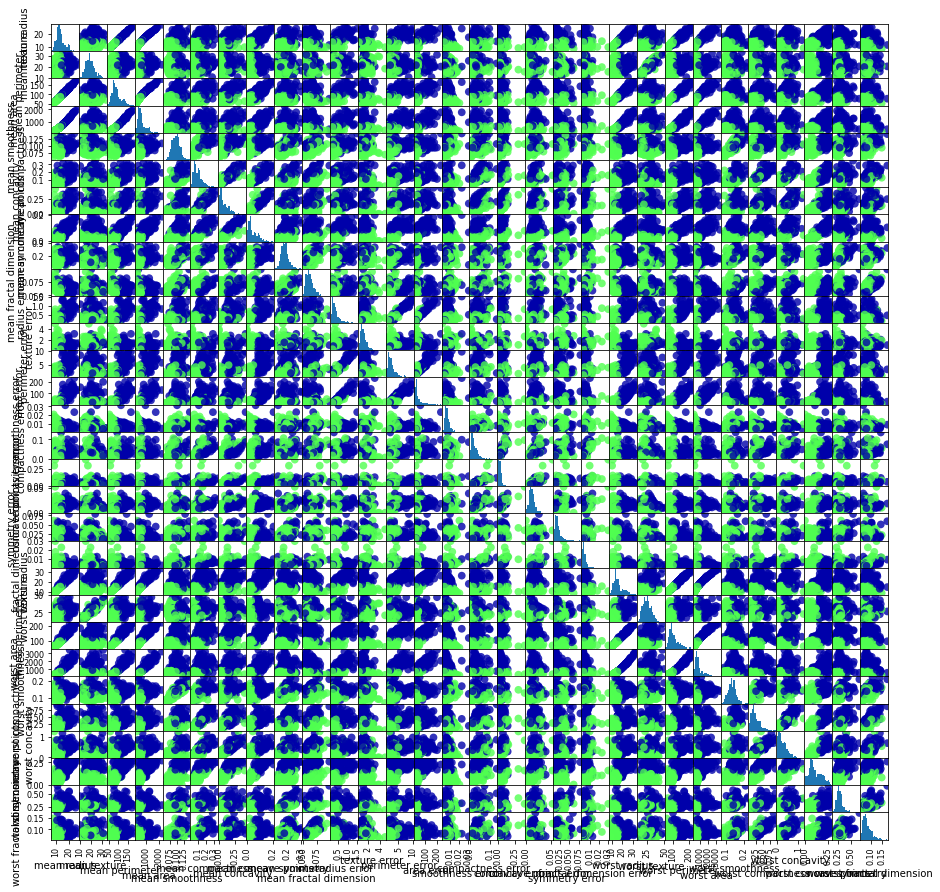

In [53]:
import pandas as pd
!pip install mglearn

import mglearn

cancer_dataframe=pd.DataFrame(X_train, columns=cancer.feature_names)
pd.plotting.scatter_matrix(cancer_dataframe, c=y_train, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)

In [54]:
training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11) 

from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
  clf=KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train,y_train))
  test_accuracy.append(clf.score(X_test,y_test))

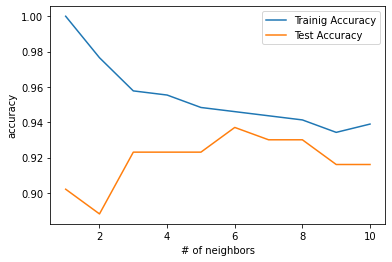

In [55]:
import matplotlib.pylab as plt
plt.plot(neighbors_settings,training_accuracy,label="Trainig Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("# of neighbors")
plt.legend()

In [56]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=5000).fit(X_train,y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수: 0.979
테스트 세트 점수: 0.944


In [57]:
logreg100=LogisticRegression(C=100,max_iter=50000).fit(X_train,y_train) 

print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [58]:
logreg001=LogisticRegression(C=0.01,max_iter=50000).fit(X_train,y_train) 

print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.960
테스트 세트 점수: 0.937


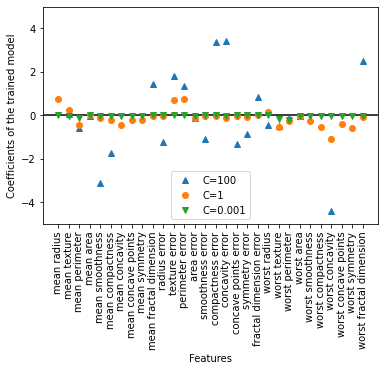

In [59]:
import matplotlib.pyplot as plt
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)

plt.ylabel("Coefficients of the trained model")
plt.xlabel("Features")

plt.legend()

C=0.001인 로지스틱 회귀의 훈련 정확도:0.92
C=0.001인 로지스틱 회귀의 훈련 정확도:0.90
C=1.000인 로지스틱 회귀의 훈련 정확도:0.97
C=1.000인 로지스틱 회귀의 훈련 정확도:0.94
C=100.000인 로지스틱 회귀의 훈련 정확도:1.00
C=100.000인 로지스틱 회귀의 훈련 정확도:0.97


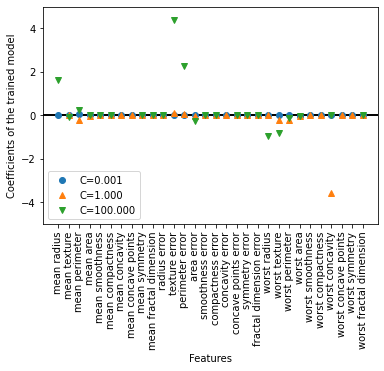

In [60]:
for C, marker in zip([0.001,1,100],['o','^','v']):
  lr_l1=LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train,y_train)
  print("C={:.3f}인 로지스틱 회귀의 훈련 정확도:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
  print("C={:.3f}인 로지스틱 회귀의 훈련 정확도:{:.2f}".format(C,lr_l1.score(X_test,y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

  plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
  xlims=plt.xlim()
  plt.hlines(0,xlims[0],xlims[1])
  plt.xlim(xlims)
  plt.xlabel("Features")
  plt.ylabel("Coefficients of the trained model")

  plt.ylim(-5,5)
  plt.legend(loc=3)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도:{:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도:0.94


Text(0, 0.5, 'Feature size')

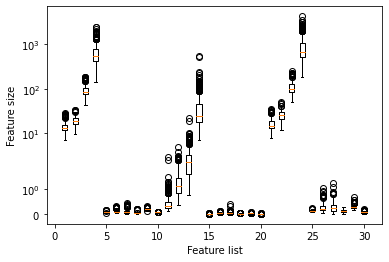

In [62]:
import matplotlib.pyplot as plt
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")

In [63]:
print("특성별 최솟값\n", X_train.min(axis=0))
print("특성별 최댓값\n", X_train.max(axis=0))


min_on_training=X_train.min(axis=0)

range_on_training=(X_train-min_on_training).max(axis=0)


X_train_scaled=(X_train-min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))


X_test_scaled=(X_test-min_on_training)/range_on_training


print("특성별 최솟값\n", X_test_scaled.min(axis=0))
print("특성별 최댓값\n", X_test_scaled.max(axis=0))


svc=SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

특성별 최솟값
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
특성별 최댓값
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
특성별 최솟값
 [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.0006785

In [64]:
svc=SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [65]:
svc=SVC(C=000.1)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.958


In [66]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}",format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}",format(tree.score(X_test,y_test)))

훈련 세트 정확도: {:.3f} 1.0
테스트 세트 정확도: {:.3f} 0.8811188811188811


In [67]:
tree=DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}", format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:3f}", format(tree.score(X_test,y_test)))

훈련 세트 정확도: {:.3f} 0.9765258215962441
테스트 세트 정확도: {:3f} 0.9370629370629371


In [68]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["악성","양성"], feature_names=cancer.feature_names, impurity=False,filled=True)

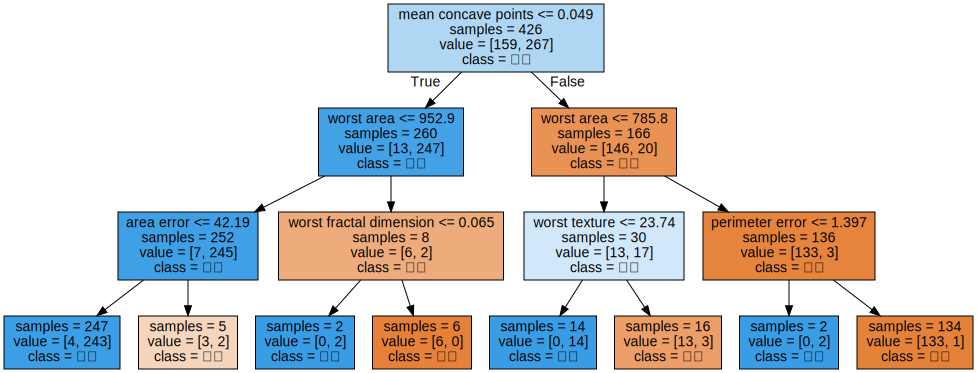

In [69]:
import graphviz
with open("tree.dot") as f:
  dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [70]:
print("특성 중요도\n", tree.feature_importances_)

특성 중요도
 [0.         0.         0.         0.         0.         0.
 0.         0.76534    0.         0.         0.         0.
 0.02131182 0.01833724 0.         0.         0.         0.
 0.         0.         0.         0.05411334 0.         0.12443031
 0.         0.         0.         0.         0.         0.01646729]


n_features: 30
model.feature_importances_: [0.         0.         0.         0.         0.         0.
 0.         0.76534    0.         0.         0.         0.
 0.02131182 0.01833724 0.         0.         0.         0.
 0.         0.         0.         0.05411334 0.         0.12443031
 0.         0.         0.         0.         0.         0.01646729]


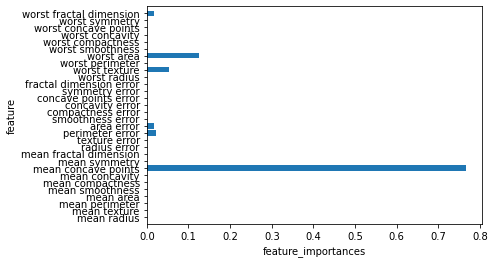

In [71]:
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
  n_features=cancer.data.shape[1]
  print("n_features:",n_features)
  plt.barh(np.arange(n_features),model.feature_importances_,align='center')
  print("model.feature_importances_:",model.feature_importances_)
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("feature_importances")
  plt.ylabel("feature")
  plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


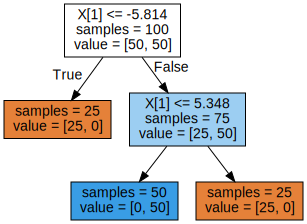

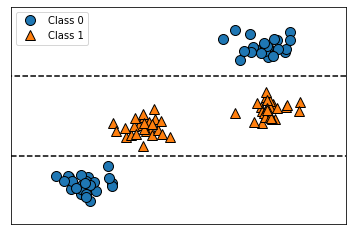

In [72]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

In [73]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [74]:
print("훈련 세트 정확도:{:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


n_features: 30
model.feature_importances_: [0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


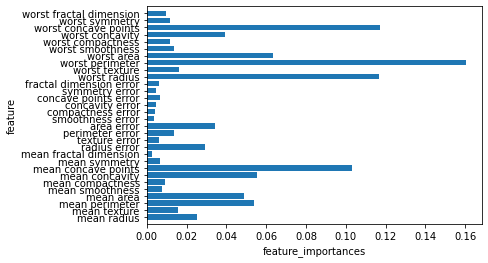

In [75]:
plot_feature_importances_cancer(forest)

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972
n_features: 30
model.feature_importances_: [0.03695242 0.01476183 0.04654039 0.03906817 0.00596818 0.01304427
 0.05483359 0.12282063 0.0048224  0.00361664 0.01690536 0.00531919
 0.01270645 0.03906381 0.00410532 0.00531703 0.00639327 0.00594768
 0.00444821 0.00563904 0.09978798 0.01659583 0.12850222 0.10203994
 0.01266605 0.0177049  0.03405745 0.12143374 0.01205929 0.00687872]


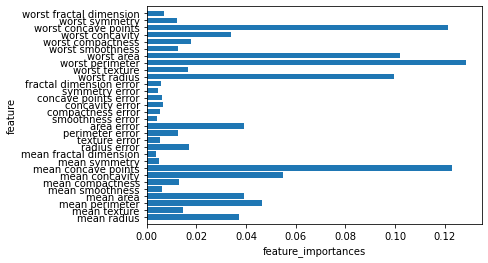

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10000,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(forest.score(X_test,y_test)))

plot_feature_importances_cancer(forest)

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

ValueError: ignored

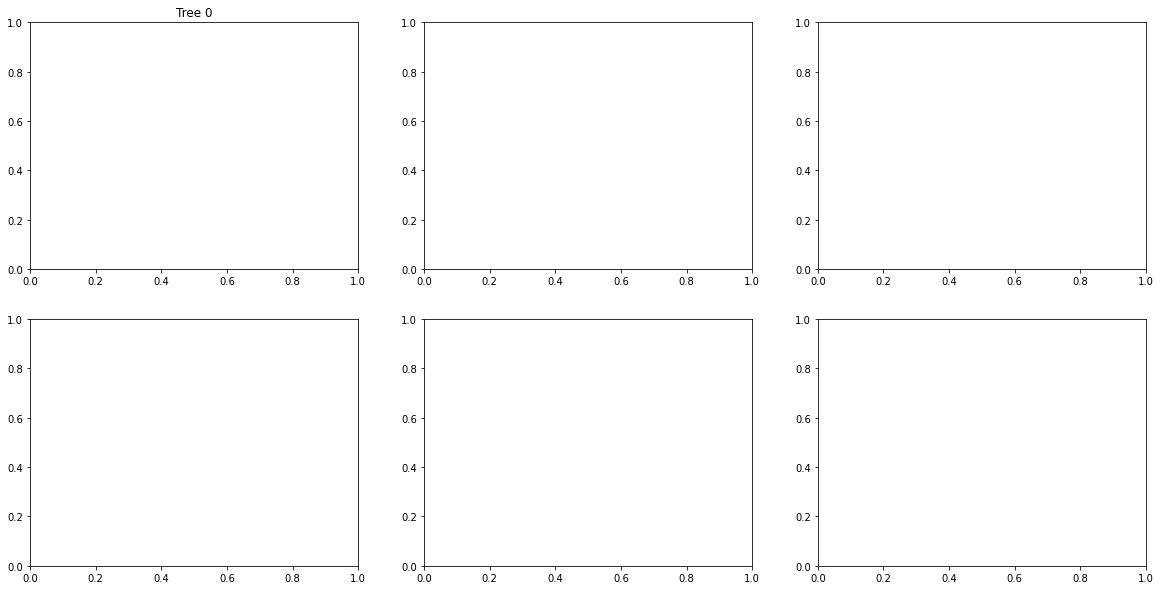

In [78]:
#error case
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(cancer['data'],cancer['target'],tree,ax=ax)


mglearn.plots.plot_2d_separator(forest,cancer['data'],fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(cancer['data'][:,0],cancer['data'][:,1],cancer['target'])

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [80]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [81]:
gbrt=GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


n_features: 30
model.feature_importances_: [0.00000000e+00 9.07529959e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.32035766e-03 2.65686907e-01
 3.49588341e-04 0.00000000e+00 0.00000000e+00 3.00083378e-04
 0.00000000e+00 1.45838255e-02 1.05083243e-03 0.00000000e+00
 4.75469106e-03 0.00000000e+00 9.56890421e-04 0.00000000e+00
 9.23939383e-03 1.61819935e-02 3.22495788e-01 9.24249926e-02
 6.44041105e-03 0.00000000e+00 6.85101108e-03 2.31450675e-01
 6.41500790e-03 3.42225071e-03]


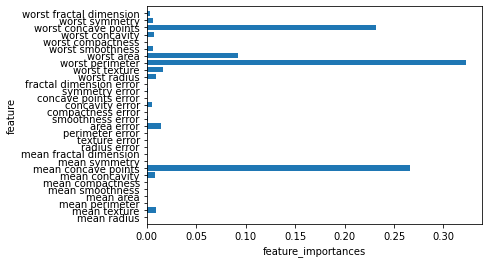

In [82]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
Xc_train,Xc_test, yc_train, yc_test=train_test_split(cancer.data,cancer.target,random_state=0)

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)

In [84]:
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도:{:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도:{:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 정확도:{:.3f}".format(bagging.oob_score_))

훈련 세트 정확도:0.953
테스트 세트 정확도:0.958
OOB 샘플의 정확도:0.941


In [85]:
from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)

bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도:{:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도:{:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 정확도:{:.3f}".format(bagging.oob_score_))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.965
OOB 샘플의 정확도:0.948
